In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

results_path = "/home/antoniu/Desktop/MFI_git/MFI_master/MFI/results_plot"
path = "/home/antoniu/Desktop/MFI_git/MFI_master/MFI"
os.chdir(path)

from pyMFI import MFI
# from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 14})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)


# Plot 1 - 1 simulation and a second simulation patched

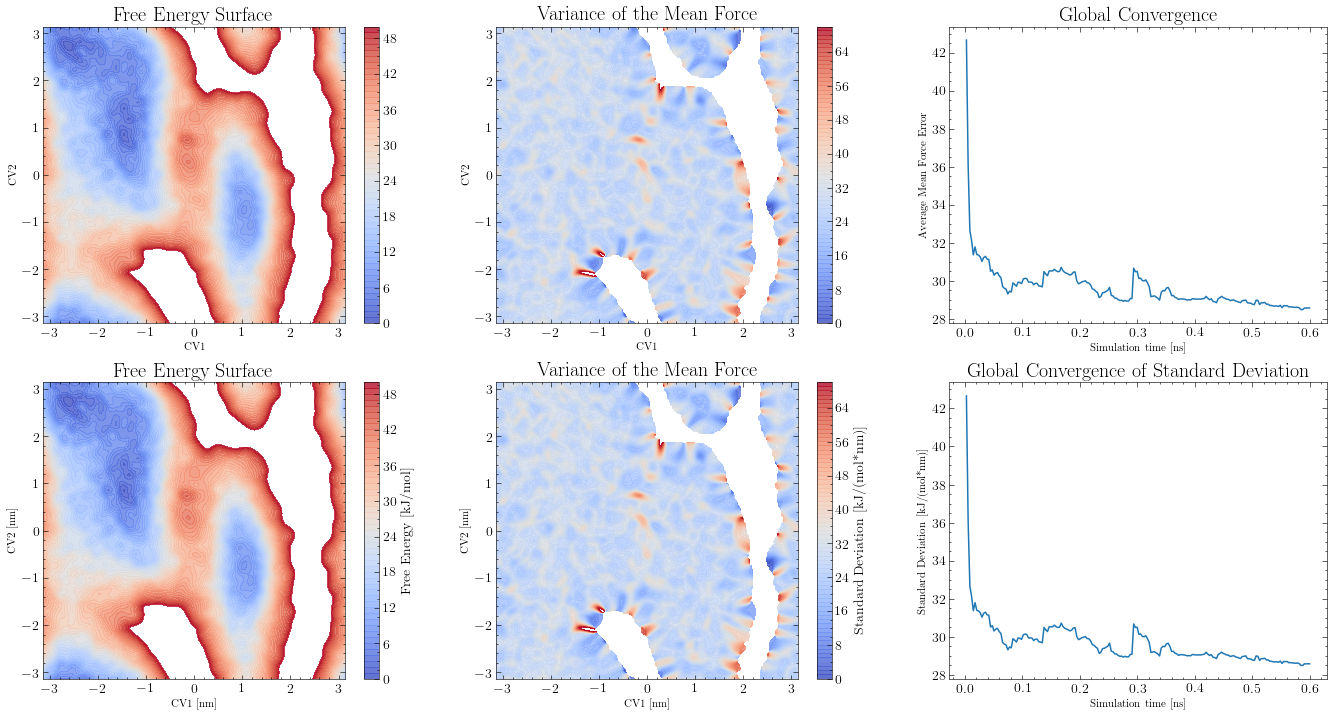

In [19]:
#Load force terms
Ftot_master = []
with open(results_path + "/alanine_dipeptide_300K.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = Ftot_master[-1]
#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

FES_lim = 51
ofe_map_lim = 71

plt.rcParams["figure.figsize"] = (23,12)
plt.subplot(2,3,1)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,2)
plt.contourf(X, Y, zero_to_nan(ofe), levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,3)
plt.plot([time/1000 for time in time_history], ofe_history)
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ns]', fontsize=11)
plt.title('Global Convergence', fontsize=20)



#Load force terms
Ftot_master = []
with open(results_path + "/alanine_dipeptide_300K.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = Ftot_master[-1]
#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)


plt.subplot(2,3,4)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2 [nm]', fontsize=11)
plt.xlabel('CV1 [nm]', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar(label="Free Energy [kJ/mol]")

plt.subplot(2,3,5)
plt.contourf(X, Y, zero_to_nan(ofe), levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2 [nm]', fontsize=11)
plt.xlabel('CV1 [nm]', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar(label="Standard Deviation [kJ/(mol*nm)]")


plt.subplot(2,3,6)
plt.plot([time/1000 for time in time_history], ofe_history)
plt.ylabel('Standard Deviation [kJ/(mol*nm)]', fontsize=11)
plt.xlabel('Simulation time [ns]', fontsize=11)
plt.title('Global Convergence of Standard Deviation', fontsize=20)
# plt.savefig('/home/antoniu/Desktop/Windows/results_1b.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)


In [34]:
min_grid=np.array((-np.pi, -np.pi))

print(type(min_grid[1]))

<class 'numpy.float64'>


# Plot 2 - 1 long simulation vs. 10 short simulations

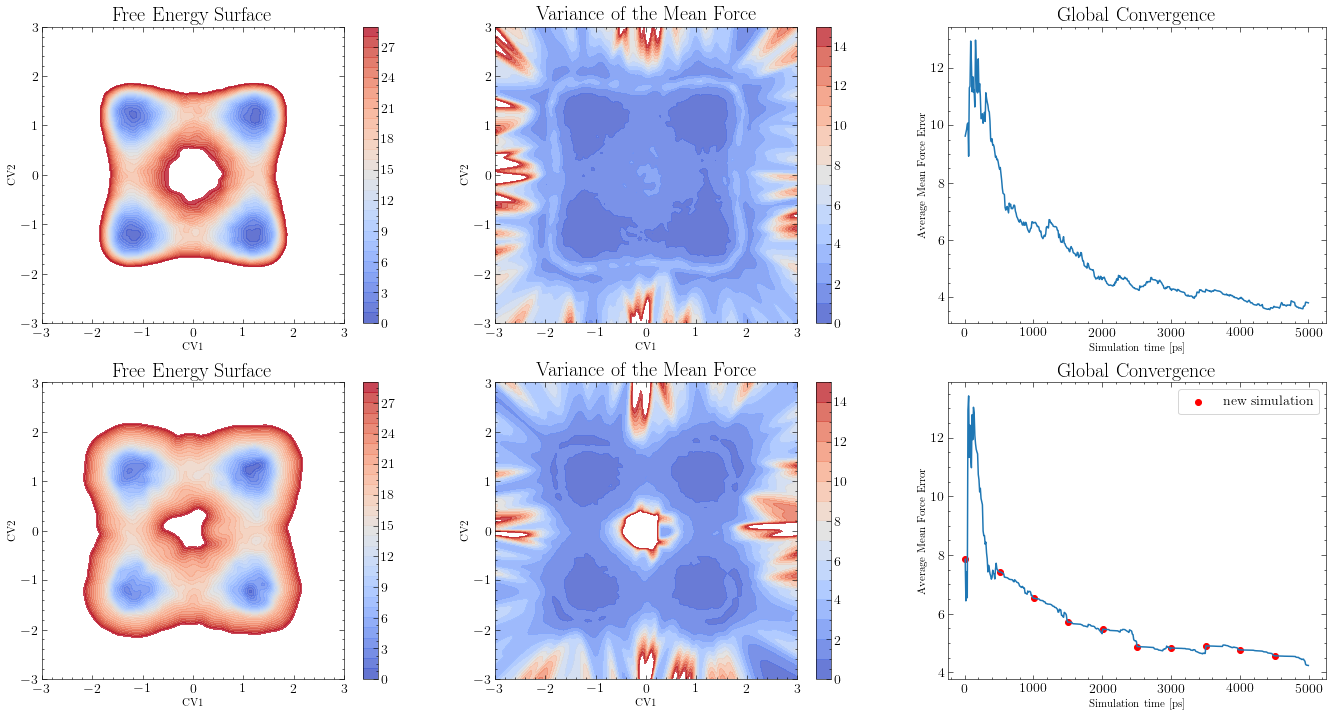

In [30]:
#Load force terms
Ftot_master = []
with open(results_path + "/bjola_pot_1M.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe, ofe_history, ofe_history_time, Ftot_den2, ofv_x, ofv_y] = Ftot_master[-1]

[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)))

FES_lim = 30
ofe_map_lim = 16

plt.rcParams["figure.figsize"] = (23,12)
plt.subplot(2,3,1)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,2)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,3)
plt.plot(ofe_history_time, ofe_history)
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Global Convergence', fontsize=20)


#Load force terms
Ftot_master = []
with open(results_path + "/bjola_pot_multisim.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe, ofe_history_patch_time, ofe_history_patch, sim_start, sim_start_error, Ftot_den2, ofv_x, ofv_y] = Ftot_master[-1]

[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)))



plt.subplot(2,3,4)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,5)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,6)
plt.plot(ofe_history_patch_time, ofe_history_patch)
plt.scatter(sim_start, sim_start_error, c="r", label="new simulation")
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Global Convergence', fontsize=20)
plt.legend()
plt.savefig('/home/antoniu/Desktop/Windows/results_2.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)

# Plot 3 - MetaD with static bias

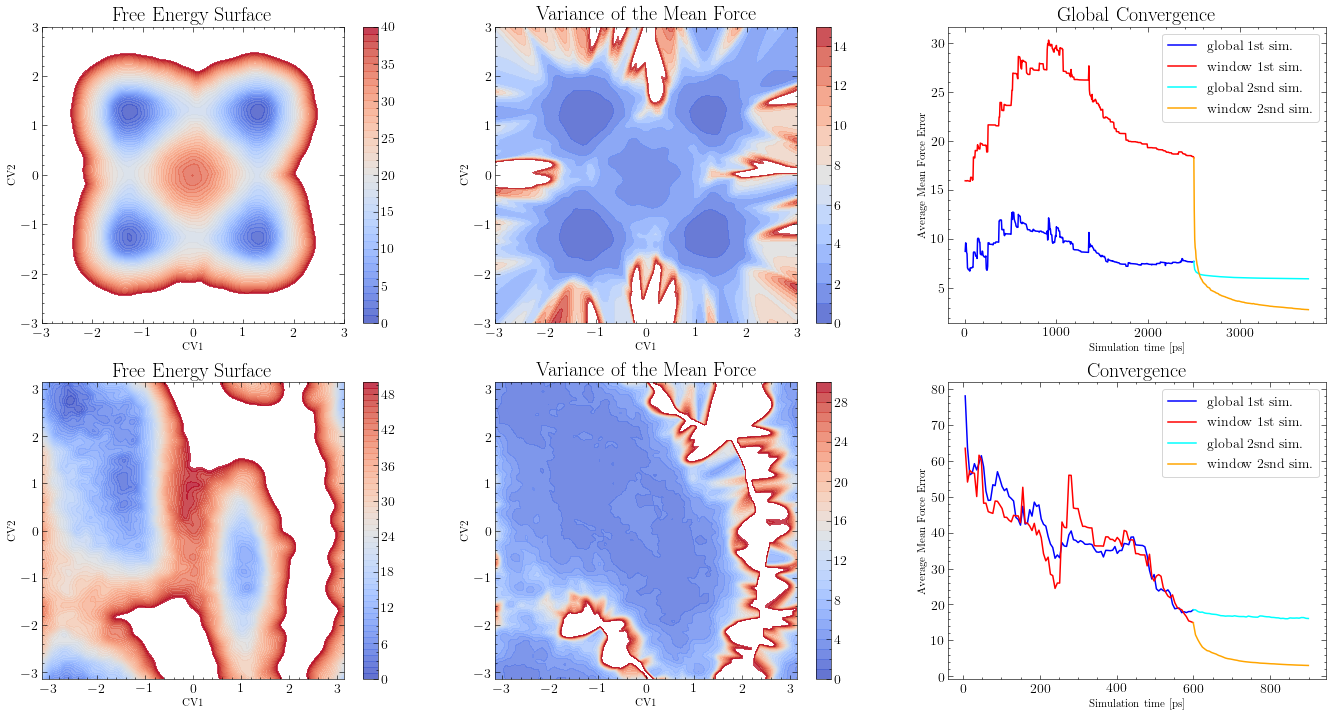

In [42]:
#Load force terms
with open(results_path + "/bjola_pot_static_patch_window.pkl", "rb") as fr:
    [X, Y, Ftot_den, FES, Ftot_den, ofe, ofe_history_time_old, ofe_history_old, ofe_history_window_old, ofe_history_time, ofe_history, ofe_history_window] = pickle.load(fr)

    
ofe_history_time = [ofe_history_time_old[-1]] + ofe_history_time
ofe_history = [ofe_history_old[-1]] + ofe_history
ofe_history_window = [ofe_history_window_old[-1]] + ofe_history_window


FES_lim = 41
ofe_map_lim = 16

plt.rcParams["figure.figsize"] = (23,12)
plt.subplot(2,3,1)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,2)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,3)
plt.plot(ofe_history_time_old, ofe_history_old, c="blue", label="global 1st sim.")
plt.plot(ofe_history_time_old, ofe_history_window_old, c="red", label="window 1st sim.")
plt.plot(ofe_history_time, ofe_history, c="cyan", label="global 2snd sim.")
plt.plot(ofe_history_time, ofe_history_window, c="orange", label="window 2snd sim.")
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Global Convergence', fontsize=20)
plt.legend()



    
#Load force terms
with open(results_path + "/alanine_dipeptide_static_patch.pkl", "rb") as fr:
    [X, Y, Ftot_den, FES, Ftot_den, ofe, ofe_history_time_old, ofe_history_old, ofe_history_window_old, ofe_history_time, ofe_history, ofe_history_window] = pickle.load(fr)

ofe_history_time = [ofe_history_time_old[-1]] + ofe_history_time
ofe_history = [ofe_history_old[-1]] + ofe_history
ofe_history_window = [ofe_history_window_old[-1]] + ofe_history_window    
    
FES_lim = 51
ofe_map_lim = 31

plt.subplot(2,3,4)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Free Energy Surface', fontsize=20)
plt.colorbar()

plt.subplot(2,3,5)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel('CV2', fontsize=11)
plt.xlabel('CV1', fontsize=11)
plt.title('Variance of the Mean Force', fontsize=20)
plt.colorbar()


plt.subplot(2,3,6)
plt.plot(ofe_history_time_old, ofe_history_old, c="blue", label="global 1st sim.")
plt.plot(ofe_history_time_old, ofe_history_window_old, c="red", label="window 1st sim.")
plt.plot(ofe_history_time, ofe_history, c="cyan", label="global 2snd sim.")
plt.plot(ofe_history_time, ofe_history_window, c="orange", label="window 2snd sim.")
plt.ylabel('Average Mean Force Error', fontsize=11)
plt.xlabel('Simulation time [ps]', fontsize=11)
plt.title('Convergence', fontsize=20)
plt.legend()
plt.savefig('/home/antoniu/Desktop/Windows/results_3.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)

# Plot 4

In [2]:
import os 
os.chdir("/home/antoniu/Desktop/MFI_git/MFI")
from pyMFI import MFI
from pyMFI import run_plumed

import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

path_data = "/home/antoniu/Desktop/MFI_git/MFI/Invernizzi_2D_potential"
os.chdir(path_data)

forces_all = []

for simulation in np.arange(0,40): 
        
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofe, ofe_history, ofe_history_time, Ftot_den2, ofv_x, ofv_y] = MFI.load_pkl(path_data + "/forces_inve_" + str(simulation))
    
    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

In [3]:
os.chdir("/home/antoniu/Desktop/MFI_git/MFI")
from pyMFI import MFI

results = MFI.bootstrap_2D(X, Y, forces_all, 50)

[FES_avr, sd_fes, variance_prog, stdev_prog, var_fes_prog, sd_fes_prog ] = results

MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim=11, ofe_map_lim=5)



NameError: name 'MFI' is not defined

# Plot 5

In [4]:
import os
os.chdir("/home/antoniu/Desktop/MFI_git/MFI")
from pyMFI import MFI
from pyMFI import run_plumed
from pyMFI import MFI1D
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
from scipy.signal import savgol_filter
import glob
from scipy import interpolate

def save_npy(object, file_name):
    with open(file_name, "wb") as fw:
        np.save(fw, object)


def load_npy(name):
    with open(name, "rb") as fr:
        return np.load(fr)

def save_pkl(object, file_name):
    with open(file_name, "wb") as fw:
        pickle.dump(object, fw)


def load_pkl(name):
    with open(name, "rb") as fr:
        return pickle.load(fr)


def atoi(text):
    return int(text) if text.isdigit() else text

<ipython-input-9-0113f0bf7412>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-9-0113f0bf7412>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)
<ipython-input-9-0113f0bf7412>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

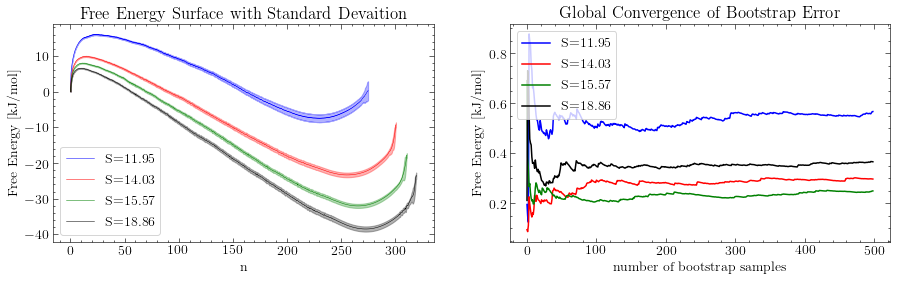

In [9]:
path = '/home/antoniu/Desktop/LJ_fluid/LJ_results/'
path_save = '/home/antoniu/Desktop/MFI_development/results'

data_name_list = ["n55", "n65", "n73", "n80"]
supersaturation_list = ["S=11.95", "S=14.03", "S=15.57", "S=18.86"]
color_list = ["blue", "red", "green", "black"]

count = -1
for i in range(len(data_name_list)):
    count += 1
    
    #Load results
    [grid_plot, FES_plot, sd_plot, var_fes, var_fes_prog, sd_fes_prog] = load_pkl(path_save + "/LJfluid_bootstrap_" + data_name_list[i])
     
    
    #plot FES with sd and sd progression    
    plt.rcParams["figure.figsize"] = ((15, 4))
    
    plt.figure(1)
    plt.subplot(1,2,1)
    plt.fill_between(grid_plot, FES_plot - sd_plot, FES_plot + sd_plot, alpha=0.3, color=color_list[count])
    plt.plot(grid_plot, FES_plot, linewidth=0.5, label=supersaturation_list[i], color=color_list[count])
    plt.title("Free Energy Surface with Standard Devaition")
    plt.xlabel("n")
    plt.ylabel("Free Energy [kJ/mol]")
    plt.legend()
    
    plt.subplot(1,2,2)
    # plt.scatter(range(len(sd_fes_prog)), sd_fes_prog, s=3)
    plt.plot(range(len(var_fes_prog)), var_fes_prog, label=supersaturation_list[i], color=color_list[count])
    plt.title("Global Convergence of Bootstrap Variance")
    plt.xlabel("number of bootstrap samples")
    plt.ylabel("Free Energy [kJ/mol]")    
    plt.legend()

plt.savefig('/home/antoniu/Desktop/Windows/results_5.png', dpi=600, bbox_inches='tight')
plt.show()


## Other functions

In [14]:
def zero_to_nan(input_array):
    output_array = np.zeros_like(input_array)
    for ii in range(len(input_array)):
        for jj in range(len(input_array[ii])):
            if input_array[ii][jj] <= 0: output_array[ii][jj] = np.nan
            else: output_array[ii][jj] = input_array[ii][jj]
    return output_array